In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import pandas as pd
from tqdm import tqdm

### Exercise 5.10

100%|██████████| 25/25 [00:20<00:00,  1.19it/s]


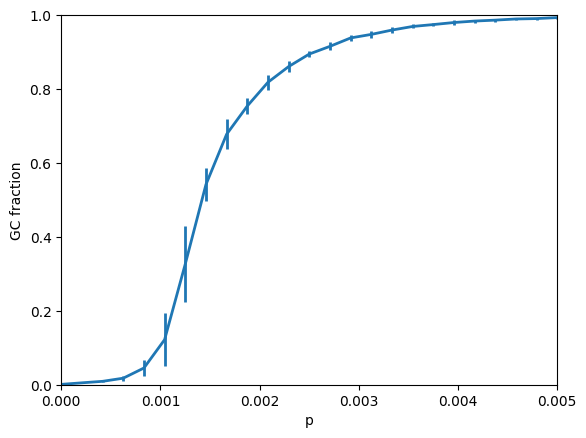

In [2]:
# Plots the fraction of nodes in the giant component as a function of p

N = 1000
p = np.linspace(0, 0.005, 25)
reps = 20

results = dict.fromkeys(p)

for pi in tqdm(p):
    results_run = []
    for i in range(reps):
        G =  nx.gnp_random_graph(1000 , pi)
        GC_fraction = len(max(nx.connected_components(G), key=len))/N
        results_run.append(GC_fraction)
    results[pi] = results_run

df = pd.DataFrame(results)
plt.errorbar(df.keys(), df.mean(), yerr=df.std(), linewidth=2)

plt.xlabel('p')
plt.ylabel('GC fraction')
plt.xlim(0, 0.005)
plt.ylim(0, 1);

### Exercise 5.15

100%|██████████| 5/5 [00:00<00:00, 369.74it/s]


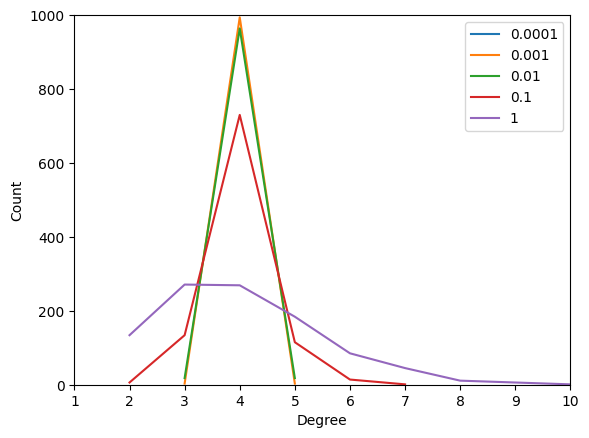

In [3]:
# Plots degree distribution of Watts-Strogatz graphs

N = 1000
k = 4
p = [0.0001, 0.001, 0.01, 0.1, 1]

results = dict.fromkeys(p)
for pi in tqdm(p):
    G = nx.watts_strogatz_graph(N, k, pi)
    results[pi] = [G.degree(n) for n in G.nodes()]

plt.figure()
for pi in p:
    counts = pd.Series(results[pi]).value_counts().sort_index()
    plt.plot(counts.index, counts.values, label=pi)
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xlim(1, 10)
plt.ylim(0, 1000);